In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

# Метод главных компонент(понижение размерности)

In [2]:
x = np.arange(0, 10, 0.1)
Data = pd.DataFrame()
Data['feature1'] = x
Data['feature2'] = [x.mean()]*len(x)

display(Data)
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data['feature1'], y=Data['feature2'], mode='markers'))
fig.show()

feature1  feature2
0        0.0      4.95
1        0.1      4.95
2        0.2      4.95
3        0.3      4.95
4        0.4      4.95
..       ...       ...
95       9.5      4.95
96       9.6      4.95
97       9.7      4.95
98       9.8      4.95
99       9.9      4.95

[100 rows x 2 columns]

**1. Стандартизируем данные**

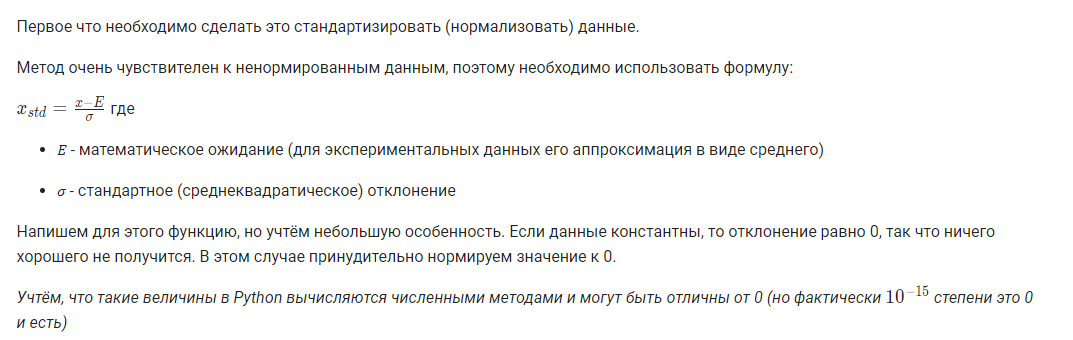

In [3]:
def normilize(col):
    if abs(col.std())< 1e-10:
        return 0
        
    return (col - col.mean())/col.std()

In [5]:
Data = Data.agg(normilize)
Data.head()

feature1  feature2
0 -1.706220         0
1 -1.671751         0
2 -1.637282         0
3 -1.602813         0
4 -1.568344         0

In [6]:
cov_matrix=Data.cov()
cov_matrix

feature1  feature2
feature1       1.0       0.0
feature2       0.0       0.0

In [6]:
eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)

Вклад каждого из оригинальных признаков тем больше, чем больше собственное число, ему соответствующее, поэтому рассчитаем величину вклада:

In [7]:
print('Вклад каждой компоненты в "разброс" признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

Вклад каждой компоненты в "разброс" признаков (в %):  [0.0, 100.0]


И наконец получим из датасета "очищенные" данные, умножив исходную матрицу (с нормированными данными) на интересующий нас собственный вектор

In [8]:
Data.dot(eigh_vec[:, 1:])

0
0  -1.706220
1  -1.671751
2  -1.637282
3  -1.602813
4  -1.568344
..       ...
95  1.568344
96  1.602813
97  1.637282
98  1.671751
99  1.706220

[100 rows x 1 columns]

**2. Усложним данные**

In [7]:
Data = pd.DataFrame()
Data['feature1'] = x
Data['feature2'] = [x.mean()]*len(x)
Data['feature3'] = np.random.uniform(size=100)

In [10]:
Data

feature1  feature2  feature3
0        0.0      4.95  0.256193
1        0.1      4.95  0.077632
2        0.2      4.95  0.295244
3        0.3      4.95  0.133936
4        0.4      4.95  0.114364
..       ...       ...       ...
95       9.5      4.95  0.040227
96       9.6      4.95  0.036581
97       9.7      4.95  0.626339
98       9.8      4.95  0.692366
99       9.9      4.95  0.596465

[100 rows x 3 columns]

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Data['feature1'], y=Data['feature2'], z=Data['feature3'], mode='markers'))
fig.show()

In [12]:
fig = go.Figure()

fig.add_trace(go.Splom(dimensions=[
    dict(label='feature1', values=Data['feature1']),
    dict(label='feature2', values=Data['feature2']),
    dict(label='feature3', values=Data['feature3'])
],))

fig.show()

In [9]:
Data = Data.apply(normilize)

In [11]:
cov_matrix = np.cov(np.transpose(Data))

eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)
print(cov_matrix)
print('Собственные числа: ', eigh_val, '\n', sep='\n')
print('Собственные векторы: ', eigh_vec, sep='\n')

print('Вклад каждой компоненты в "разброс" признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

[[1.         0.         0.26786433]
 [0.         0.         0.        ]
 [0.26786433 0.         1.        ]]
Собственные числа: 
[0.         0.73213567 1.26786433]


Собственные векторы: 
[[ 0.         -0.70710678 -0.70710678]
 [-1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
Вклад каждой компоненты в "разброс" признаков (в %):  [0.0, 36.606783610626145, 63.393216389373855]


Неприятное открытие, не правда ли? Если ваши данные зашумлены, то Метод Главных Компонент вполне может определить именно шум как значимую часть информации. Он никак не учитывает "ответ", а анализирует только "признаки", поэтому признак с хорошим разбросом (например, равномерный шум) будет принят за полезную информацию.

**Пример**

Зададим 2 и 3 признаки через 1, после чего забудем об этом.

В нашем случае это будет простая линейная зависимость, т.е. по сути некая прямая в 3D.

In [12]:
Data = pd.DataFrame()
Data['feature1'] = x
Data['feature2'] = 2*x-1
Data['feature3'] = -0.5*x + 10
display(Data)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Data['feature1'], y=Data['feature2'], z=Data['feature3'], mode='markers'))
fig.show()

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[
    dict(label='feature1', values=Data['feature1']),
    dict(label='feature2', values=Data['feature2']),
    dict(label='feature3', values=Data['feature3'])
],))
fig.show()

feature1  feature2  feature3
0        0.0      -1.0     10.00
1        0.1      -0.8      9.95
2        0.2      -0.6      9.90
3        0.3      -0.4      9.85
4        0.4      -0.2      9.80
..       ...       ...       ...
95       9.5      18.0      5.25
96       9.6      18.2      5.20
97       9.7      18.4      5.15
98       9.8      18.6      5.10
99       9.9      18.8      5.05

[100 rows x 3 columns]

In [22]:
from sklearn.decomposition import PCA
tr = PCA()
new = tr.fit_transform(Data)


In [13]:
Data = Data.apply(normilize)
cov_matrix = np.cov(np.transpose(Data))

eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)
print(cov_matrix)
print('Собственные числа: ', eigh_val, '\n', sep='\n')
print('Собственные векторы: ', eigh_vec, sep='\n')

print('Вклад каждой компоненты в "разброс" признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

[[ 1.  1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  1.]]
Собственные числа: 
[-4.68025813e-17  2.68847186e-16  3.00000000e+00]


Собственные векторы: 
[[-0.75353665  0.3144029   0.57735027]
 [ 0.64904922  0.49538044  0.57735027]
 [-0.10448743  0.80978333 -0.57735027]]
Вклад каждой компоненты в "разброс" признаков (в %):  [-1.5600860446804725e-15, 8.961572875514846e-15, 100.0]


In [17]:
Data.dot(eigh_vec[:, 2])

0    -2.955260
1    -2.895558
2    -2.835856
3    -2.776154
4    -2.716452
        ...   
95    2.716452
96    2.776154
97    2.835856
98    2.895558
99    2.955260
Length: 100, dtype: float64

**Пример 2**

Зададим 2 и 3 признаки через 1, после чего так же забудем об этом, но на сей раз зависимость 3 признака от 1 будет не линейной, а квадратичной.

Легко догадаться, что чуда не произойдёт, PCA не способен в полной мере компенсировать такую зависимость, т.к. производимые нами матричные операции эквивалентны комбинации 2 простых:

Поворот осей на некоторый угол

Перенос начала координат в какую-то точку

In [14]:
Data = pd.DataFrame()
Data['feature1'] = x
Data['feature2'] = 2*x-1
Data['feature3'] = x**2
display(Data)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Data['feature1'], y=Data['feature2'], z=Data['feature3'], mode='markers'))
fig.show()

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[
    dict(label='feature1', values=Data['feature1']),
    dict(label='feature2', values=Data['feature2']),
    dict(label='feature3', values=Data['feature3'])
],))
fig.show()

feature1  feature2  feature3
0        0.0      -1.0      0.00
1        0.1      -0.8      0.01
2        0.2      -0.6      0.04
3        0.3      -0.4      0.09
4        0.4      -0.2      0.16
..       ...       ...       ...
95       9.5      18.0     90.25
96       9.6      18.2     92.16
97       9.7      18.4     94.09
98       9.8      18.6     96.04
99       9.9      18.8     98.01

[100 rows x 3 columns]

In [15]:
Data = Data.apply(normilize)
cov_matrix = np.cov(np.transpose(Data))

eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)
print(cov_matrix)
print('Собственные числа: ', eigh_val, '\n', sep='\n')
print('Собственные векторы: ', eigh_vec, sep='\n')

print('Вклад каждой компоненты в "разброс" признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

Data.dot(eigh_vec[:, 1:])

[[1.         1.         0.96764439]
 [1.         1.         0.96764439]
 [0.96764439 0.96764439 1.        ]]
Собственные числа: 
[-1.01849945e-16  4.30609685e-02  2.95693903e+00]


Собственные векторы: 
[[-7.07106781e-01 -4.05220539e-01 -5.79479348e-01]
 [ 7.07106781e-01 -4.05220539e-01 -5.79479348e-01]
 [ 5.66213743e-15  8.19507553e-01 -5.73068382e-01]]
Вклад каждой компоненты в "разброс" признаков (в %):  [-3.3949981609967515e-15, 1.4353656167786735, 98.56463438322133]


0         1
0   0.476223  2.611388
1   0.448564  2.571246
2   0.421457  2.530719
3   0.394902  2.489805
4   0.368900  2.448505
..       ...       ...
95  0.314167 -2.926163
96  0.338967 -3.002988
97  0.364318 -3.080199
98  0.390222 -3.157796
99  0.416679 -3.235779

[100 rows x 2 columns]

In [20]:
Data

feature1  feature2  feature3
0  -1.706220 -1.706220 -1.106235
1  -1.671751 -1.671751 -1.105898
2  -1.637282 -1.637282 -1.104888
3  -1.602813 -1.602813 -1.103203
4  -1.568344 -1.568344 -1.100845
..       ...       ...       ...
95  1.568344  1.568344  1.934354
96  1.602813  1.602813  1.998703
97  1.637282  1.637282  2.063726
98  1.671751  1.671751  2.129423
99  1.706220  1.706220  2.195794

[100 rows x 3 columns]

Наибольший вклад дала "квадратичная" компонента, т.к. её разброс наибольший даже после нормировки, но и небольшой кусочек "линейной" компоненты остался.

**Автоматизация через scitit-learn**

In [21]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(Data)
pca.transform(Data)

array([[-2.61138752e+00,  4.76222861e-01, -1.06304504e-15],
       [-2.57124618e+00,  4.48563785e-01, -8.41150048e-16],
       [-2.53071871e+00,  4.21456905e-01, -1.06364350e-15],
       [-2.48980509e+00,  3.94902222e-01, -8.42346983e-16],
       [-2.44850533e+00,  3.68899735e-01, -1.06543891e-15],
       [-2.40681943e+00,  3.43449444e-01, -8.44740854e-16],
       [-2.36474739e+00,  3.18551349e-01, -8.46386641e-16],
       [-2.32228920e+00,  2.94205451e-01, -8.48331661e-16],
       [-2.27944487e+00,  2.70411749e-01, -6.28531310e-16],
       [-2.23621440e+00,  2.47170244e-01, -8.53119403e-16],
       [-2.19259779e+00,  2.24480934e-01, -7.44939822e-16],
       [-2.14859504e+00,  2.02343821e-01, -7.48081777e-16],
       [-2.10420615e+00,  1.80758905e-01, -7.51522967e-16],
       [-2.05943111e+00,  1.59726184e-01, -6.44241088e-16],
       [-2.01426993e+00,  1.39245660e-01, -6.48280745e-16],
       [-1.96872261e+00,  1.19317332e-01, -6.52619636e-16],
       [-1.92278915e+00,  9.99412006e-02

In [22]:
pca.explained_variance_ratio_

array([9.85646344e-01, 1.43536562e-02, 3.85716588e-32])

После чего можно принять решение, что нам нужно 2 компоненты, обеспечивающие почти 100% данных о признаках (98,6% + 1,4%).

Для этого при создании модели необходимо просто указать сколько компонент мы хотим получить в итоге:n_components=2

In [23]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(Data)
pca.transform(Data)

array([[-2.61138752,  0.47622286],
       [-2.57124618,  0.44856378],
       [-2.53071871,  0.42145691],
       [-2.48980509,  0.39490222],
       [-2.44850533,  0.36889973],
       [-2.40681943,  0.34344944],
       [-2.36474739,  0.31855135],
       [-2.3222892 ,  0.29420545],
       [-2.27944487,  0.27041175],
       [-2.2362144 ,  0.24717024],
       [-2.19259779,  0.22448093],
       [-2.14859504,  0.20234382],
       [-2.10420615,  0.1807589 ],
       [-2.05943111,  0.15972618],
       [-2.01426993,  0.13924566],
       [-1.96872261,  0.11931733],
       [-1.92278915,  0.0999412 ],
       [-1.87646954,  0.08111727],
       [-1.8297638 ,  0.06284553],
       [-1.78267191,  0.04512598],
       [-1.73519388,  0.02795864],
       [-1.68732971,  0.01134349],
       [-1.63907939, -0.00471947],
       [-1.59044294, -0.02023022],
       [-1.54142034, -0.03518879],
       [-1.4920116 , -0.04959515],
       [-1.44221672, -0.06344932],
       [-1.39203569, -0.07675129],
       [-1.34146853,

**Пример 3**

Создадим 2 признака, так же имеющих связь, однако не линейную зависимость.

Рассмотрим наш линейный ряд чисел от 0 до 10 с шагом 0.1. Сгенерируем парами значения признаков так, чтобы сумма значений в каждой паре давала одно из чисел нашего ряда. Почти как банковский счёт, если ЗП выплачивают 2 раза в месяц и случайная часть приходит в 1 половине, а остаток во 2.and

In [24]:
Data = pd.DataFrame()
Data['feature1'] = [np.random.uniform(high=i) for i in x]
Data['feature2'] = x - Data['feature1']
print("Признаки: ")
display(Data)
print("Сумма значений признаков: ")
display(Data['feature1'] + Data['feature2'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data['feature1'], y=Data['feature2'], mode='markers'))
fig.update_layout(
    width=500,
    height=500,
)
fig.show()

Признаки: 


feature1  feature2
0   0.000000  0.000000
1   0.078576  0.021424
2   0.100510  0.099490
3   0.083551  0.216449
4   0.022598  0.377402
..       ...       ...
95  1.307090  8.192910
96  1.148514  8.451486
97  1.129677  8.570323
98  2.570948  7.229052
99  2.717795  7.182205

[100 rows x 2 columns]

Сумма значений признаков: 


0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
     ... 
95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Length: 100, dtype: float64

In [25]:
Data = Data.apply(normilize)
cov_matrix = np.cov(np.transpose(Data))

eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)
print('Собственные числа: ', eigh_val, '\n', sep='\n')
print('Собственные векторы: ', eigh_vec, sep='\n')

print('Вклад каждой компоненты в "разброс" признаков (в %): ', [i/sum(eigh_val)*100 for i in eigh_val])

Собственные числа: 
[0.83085319 1.16914681]


Собственные векторы: 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Вклад каждой компоненты в "разброс" признаков (в %):  [41.5426593491848, 58.457340650815205]


Однако с точки зрения PCA оба признака важны и содержат полезную информацию. Метод не может совершить чудо, он не знает о внутренней связи между признаками.

Повторимся, по сути он поворачивает и сдвигает оси, а по исходному распределения признаков нельзя сказать, что такой поворот приведёт к чему-то полезному.

Поэтому иногда уменьшить размерность исходных данных можно зная об их структуре, однако метод главных компонент этой структуры не увидит.

**Пример Ирисы Фишера**

In [29]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None,
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [27]:
import plotly.express as px
fig = px.scatter_matrix(df, 
                        dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                        color="species")
fig.show()

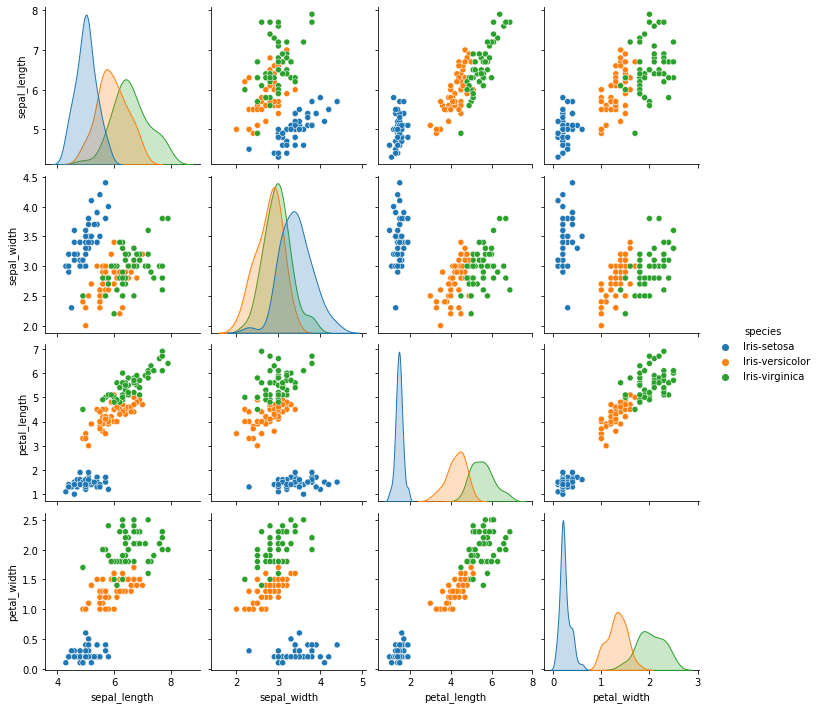

In [28]:
sns.pairplot(df, hue='species')

In [29]:
Data = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Data = Data.apply(normilize)
display(Data)
cov_matrix = np.cov(np.transpose(Data))
print('Матрица ковариаций :', cov_matrix, '\n', sep='\n')
eigh_val, eigh_vec = np.linalg.eigh(cov_matrix)


print('Собственные числа: ', eigh_val, '\n', sep='\n')
print('Собственные векторы: ', eigh_vec, '\n', sep='\n')

print('Вклад каждой компоненты в "разброс" признаков (в %):\n', [i/sum(eigh_val)*100 for i in eigh_val])

sepal_length  sepal_width  petal_length  petal_width
0       -0.897674     1.028611     -1.336794    -1.308593
1       -1.139200    -0.124540     -1.336794    -1.308593
2       -1.380727     0.336720     -1.393470    -1.308593
3       -1.501490     0.106090     -1.280118    -1.308593
4       -1.018437     1.259242     -1.336794    -1.308593
..            ...          ...           ...          ...
145      1.034539    -0.124540      0.816888     1.443121
146      0.551486    -1.277692      0.703536     0.918985
147      0.793012    -0.124540      0.816888     1.050019
148      0.430722     0.797981      0.930239     1.443121
149      0.068433    -0.124540      0.760212     0.787951

[150 rows x 4 columns]

Матрица ковариаций :
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


Собственные числа: 
[0.02060771 0.14735328 0.92122093 2.91081808]


Собственные векторы: 
[[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]


Вклад каждой компоненты в "разброс" признаков (в %):
 [0.5151926808906206, 3.683831957627395, 23.030523267680625, 72.77045209380137]


Давайте теперь выделим 3 наиболее значимых компоненты и построим 3D график зависимости новых синтетических признаков (напомним, в процессе трансформации мы повернули и сдвинули оси, поэтому некорректно говорить, что 3 новых признака будут "sepal_width", "petal_length" и "petal_width")

In [30]:
Data_PCA = Data.dot(eigh_vec[:, 1:])
Data_PCA['species'] = df['species']
display(Data_PCA)

fig = go.Figure()
for spec in Data_PCA['species'].unique():
    Data_PCA_spec = Data_PCA[Data_PCA['species']==spec]
    fig.add_trace(go.Scatter3d(x=Data_PCA_spec[0], y=Data_PCA_spec[1], z=Data_PCA_spec[2], mode='markers', name=spec))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

0         1         2         species
0    0.121536  0.504015  2.256981     Iris-setosa
1    0.226492 -0.653216  2.079459     Iris-setosa
2   -0.051308 -0.317414  2.360044     Iris-setosa
3   -0.098530 -0.573447  2.296504     Iris-setosa
4   -0.021356  0.672514  2.380802     Iris-setosa
..        ...       ...       ...             ...
145 -0.253682  0.381544 -1.864277  Iris-virginica
146  0.025297 -0.902291 -1.553288  Iris-virginica
147 -0.178679  0.265904 -1.515767  Iris-virginica
148 -0.928295  1.012968 -1.371796  Iris-virginica
149 -0.527029 -0.022210 -0.956096  Iris-virginica

[150 rows x 4 columns]

In [2]:
from sklearn import decomposition
import matplotlib.pyplot as plt


In [27]:
np.cos(90)

-0.4480736161291701

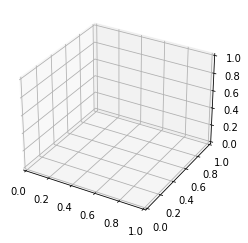

In [34]:
X = -2 + 4 * np.random.rand(20000,3)
# fig = plt.figure()
ax = plt.axes(projection='3d')
X = X[X[:,0]**2/4 + X[:,1]**2 + X[:,2]**2 < 1]
phi = np.pi/4
X = X @ np.array([[np.cos(phi), 0, np.sin(phi)], [0, 1, 0],[-np.sin(phi), 0, np.cos(phi)]])
import plotly.graph_objs as go
go.Figure(data=[go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2])])

# ax.scatter3D(X[:,0], X[:,1], X[:,2])
# ax.set_xlim(-2,2)
# ax.set_ylim(-2,2)
# ax.set_zlim(-2,2)

In [45]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = X - X.mean(axis=0)
pca.fit(X)
new = pca.transform(X)
pca.explained_variance_ratio_
go.Figure(data=[go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2]), 
                go.Scatter3d(x=new[:,0], y=new[:,1], z=[0]*len(X)),
                go.Scatter3d(x=X[:,0], y=X[:,1], z=[0]*len(X))])

In [ ]:
go.

In [71]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
data = df.iloc[:,:-1]
data = data - data.mean(axis=0)
pca.fit(data)
new = pd.DataFrame(pca.transform(data))
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [73]:
data.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000